# Домашнее задание по практике 2

*   Провести разведочный анализ EDA (описать полученный результат). Тут важно,влияет ли X[i] на Y (примеры в практике 2)
*   Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
*   Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
*   Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
*   Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат




In [ ]:
!pip install pandas seaborn scikit-learn matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn.metrics import root_mean_squared_error
import warnings

In [ ]:
df = pd.read_csv('/content/student_performance.csv')
print(f'{df.info()}\n')
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB
None

   student_id  weekly_self_study_hours  attendance_percentage  \
0           1                     18.5                   95.6   
1           2                     14.0                   80.0   
2           3                     19.5                   86.3   
3           4                     25.7                   70.2   
4           5                     13.4         

In [ ]:
df['grade'] = df['grade'].astype('category')

print(f'{df.dtypes}\n')
print(df.isnull().sum())

student_id                    int64
weekly_self_study_hours     float64
attendance_percentage       float64
class_participation         float64
total_score                 float64
grade                      category
dtype: object

student_id                 0
weekly_self_study_hours    0
attendance_percentage      0
class_participation        0
total_score                0
grade                      0
dtype: int64


In [ ]:
y = df.total_score
X = df.drop('total_score', axis=1)
X.head(n=3)

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,grade
0,1,18.5,95.6,3.8,A
1,2,14.0,80.0,2.5,B
2,3,19.5,86.3,5.3,A


In [ ]:
y.head(n=3)

,total_score
0,97.9
1,83.9
2,100.0


# EDA (разведочный анализ относительно целевой переменной)
в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа

* Y и категориальные
* Y и числовые
* Описать все полученные результаты в своем блоке
* Отобрать признаки для дальнейшего анализа, записать в best_features

            mean       std   count
grade                             
A      96.042375  4.930847  548644
B      77.946590  4.272258  258174
C      63.564524  4.216840  141980
D      49.380346  4.007757   44998
F      35.474146  4.050442    6204


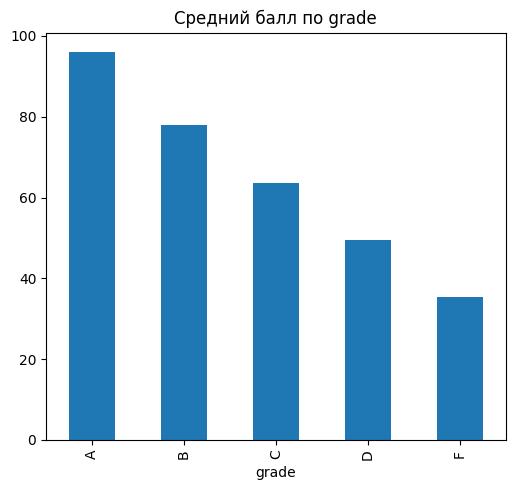

                          mean        std  count
class_participation                             
0.0                  84.332042  15.382912   1420
0.1                  84.339462  14.713295    223
0.2                  84.038487  15.676652    304
0.3                  83.187500  15.800129    336
0.4                  84.420398  15.107321    402
...                        ...        ...    ...
9.6                  84.243809  15.574433   4038
9.7                  84.341348  15.597724   3635
9.8                  84.252101  15.769449   3332
9.9                  84.192769  15.450174   3015
10.0                 84.363026  15.408166  24128

[101 rows x 3 columns]


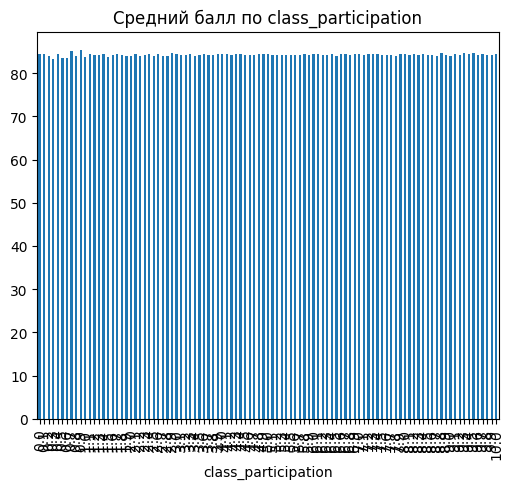

In [ ]:
#влияние категориальных переменных на y
import matplotlib.pyplot as plt

cat_columns = ['grade', 'class_participation']

for cat_col in cat_columns:
    group_stats = df.groupby(cat_col, observed=True)['total_score'].agg(['mean', 'std', 'count'])
    print(group_stats)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 2)
    df.groupby(cat_col, observed=True)['total_score'].mean().plot(kind='bar')
    plt.title(f'Средний балл по {cat_col}')
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

**1 график**

Сильная и прямая зависимость между итоговой оценкой (grade) и средним баллом (total_score). Буквенная оценка, скорее всего, присваивается на основе числового балла (например, 90-100 = A, 80-89 = B и т.д.). Данные в этих двух столбцах согласованы между собой.

**2 график**

Отсутствует видимая корреляция между уровнем активности студента на занятиях и его итоговым баллом. Студенты, которые совсем не участвуют в обсуждениях (активность 0.0), в среднем получают такой же высокий итоговый балл, как и самые активные студенты (активность 10.0).

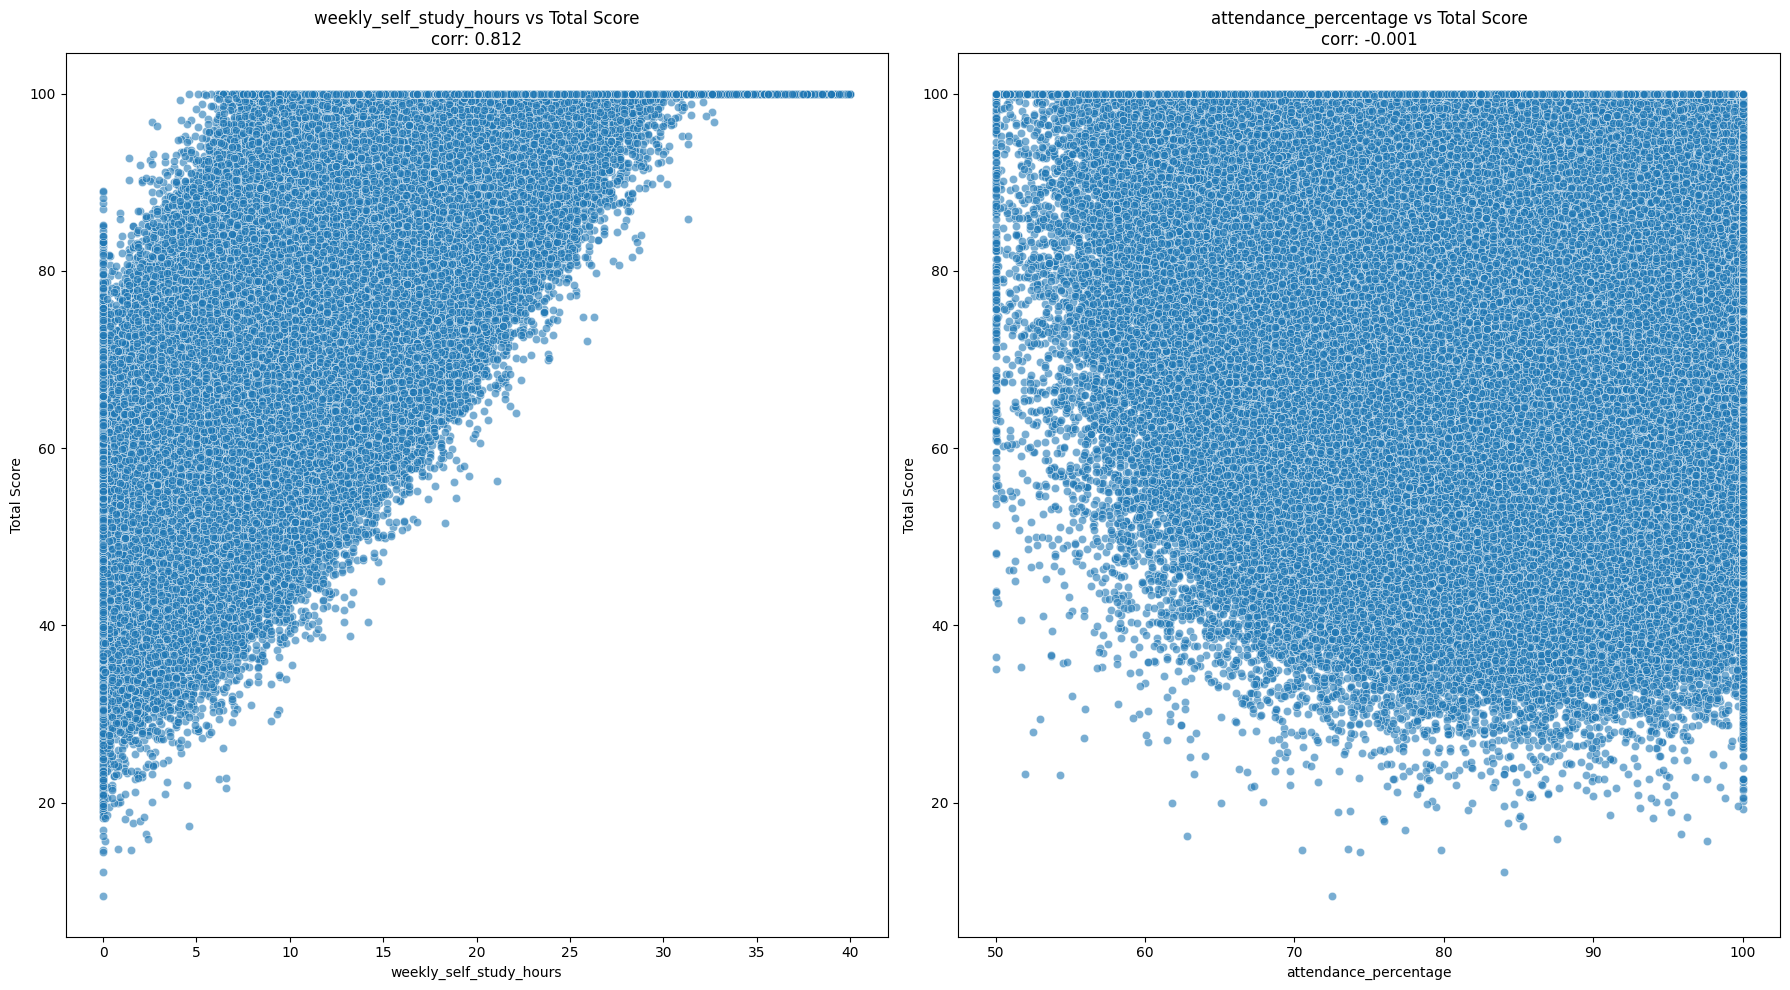

In [ ]:
#влияние числовых переменных на y
import seaborn as sns
numerical_columns = ['weekly_self_study_hours', 'attendance_percentage']
correlations = df[numerical_columns].corrwith(y).sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_columns):
    sns.scatterplot(x=df[feature], y=df['total_score'], alpha=0.6, ax=axes[i])
    correlation = correlations[feature]
    axes[i].set_title(f'{feature} vs Total Score\ncorr: {correlation:.3f}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Total Score')

plt.tight_layout()
plt.show()

1 график

Существует сильная положительная связь: чем больше студент занимается сам, тем выше его оценка.

2 график

Линейная связь между посещаемостью и итоговым баллом отсутствует. Высокая посещаемость не гарантирует высокой оценки.

In [ ]:
miss_data = df.isnull().sum()
miss_data

,0
student_id,0
weekly_self_study_hours,0
attendance_percentage,0
class_participation,0
total_score,0
grade,0


Пропущенных значений в датасете нет.

# Моделирование

**Общая задача:** Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**

* Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом bool по логике можно интерпретировать как (true, false) То можно LabelEncoder)
* Числовые признаки записать в X_scaled и провести стандартизацию с помощью StandardScaler. Желательно без категориальных признаков

Метрики: (MAE, MAPE, R², MSE, RMSE)

**Модель 1.**

* Использовать все признаки (кроме y).
* Обучить на всей выборке (без разделения).
* Сделать предсказания на этой же выборке.
* Вывести метрики и интерпретировать.
* Построить график коэффициентов (model.coef_ vs X_scaled.columns) и интерпретировать.

**Модель 2.**

* Использовать все признаки.
* Сделать train_test_split.
* Обучить на X_train, предсказать на X_train и X_test.
* Вывести метрики для обучающей и тестовой выборки, интерпретировать.
* Визуализировать коэффициенты и интерпретировать.

**Модель 3.**

* Использовать только best_features (отобранные признаки).
* Обучить на всей выборке.
* Предсказать на всей выборке.
* Вывести метрики качества и интерпретировать.
* Визуализировать коэффициенты и интерпретировать.

**Модель 4.**

* Использовать best_features.
* Сделать train_test_split.
* Обучить на X_train, предсказать на X_train и X_test.
* Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
* Визуализировать коэффициенты и интерпретировать.

P.S.

* Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
* Все примеры есть в практике 2

P.S.S Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

В результате должно получиться 4 модели

* первые две на всех колонках (фичах)
* последующие на отобранных фичах (колонках)

# **Предобработка**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(X[['grade']])
X_encoded = encoded


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['weekly_self_study_hours', 'attendance_percentage', 'class_participation']])

In [ ]:
import numpy as np
X_all_n = np.hstack([X_encoded, X_scaled])

In [ ]:
X_all = pd.DataFrame(X_all_n)
X_all.head()

,0,1,2,3,4,5,6,7
0,1.0,0.0,0.0,0.0,0.0,0.503067,1.155432,-1.116940
1,0.0,1.0,0.0,0.0,0.0,-0.149161,-0.499891,-1.781419
2,1.0,0.0,0.0,0.0,0.0,0.648006,0.168605,-0.350233
3,1.0,0.0,0.0,0.0,0.0,1.546632,-1.539774,0.518701
4,1.0,0.0,0.0,0.0,0.0,-0.236125,-0.298281,0.467588


In [ ]:
grade_columns = [f'grade_{cat}' for cat in encoder.categories_[0]]
numeric_columns = ['weekly_self_study_hours', 'attendance_percentage', 'class_participation']
all_columns = grade_columns + numeric_columns
X_all = pd.DataFrame(X_all_n, columns=all_columns)
X_all.head()

,grade_A,grade_B,grade_C,grade_D,grade_F,weekly_self_study_hours,attendance_percentage,class_participation
0,1.0,0.0,0.0,0.0,0.0,0.503067,1.155432,-1.116940
1,0.0,1.0,0.0,0.0,0.0,-0.149161,-0.499891,-1.781419
2,1.0,0.0,0.0,0.0,0.0,0.648006,0.168605,-0.350233
3,1.0,0.0,0.0,0.0,0.0,1.546632,-1.539774,0.518701
4,1.0,0.0,0.0,0.0,0.0,-0.236125,-0.298281,0.467588


In [ ]:
columns_drop = ['attendance_percentage', 'class_participation']
X_best = X_all.drop(columns=columns_drop)
X_best.head()

,grade_A,grade_B,grade_C,grade_D,grade_F,weekly_self_study_hours
0,1.0,0.0,0.0,0.0,0.0,0.503067
1,0.0,1.0,0.0,0.0,0.0,-0.149161
2,1.0,0.0,0.0,0.0,0.0,0.648006
3,1.0,0.0,0.0,0.0,0.0,1.546632
4,1.0,0.0,0.0,0.0,0.0,-0.236125


# **Модель 1**

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [ ]:
model1.fit(X_all, y)

LinearRegression()

In [ ]:
y_pred = model1.predict(X_all)
y_pred

array([95.60679951, 78.89911111, 96.10596765, ..., 93.44708053,
       99.01439517, 95.50673843])

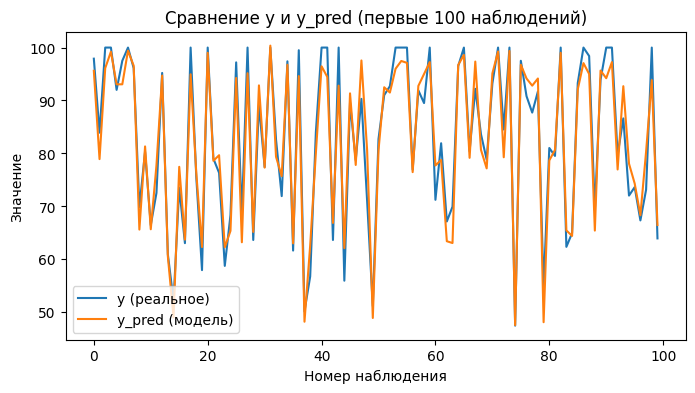

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

n = 100
y_small = y[:n]
y_pred_small = y_pred[:n]

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(y_small)), y=y_small, label="y (реальное)")
sns.lineplot(x=range(len(y_pred_small)), y=y_pred_small, label="y_pred (модель)")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title(f"Сравнение y и y_pred (первые {n} наблюдений)")
plt.legend()
plt.show()

График показывает очень высокую точность модели. Оранжевая линия (предсказания модели) практически идеально повторяет синюю линию (реальные значения), что говорит о минимальной ошибке. Модель успешно нашла закономерности и очень хорошо предсказывает итоговый балл на данных, на которых она обучалась.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

MAE = mean_absolute_error(y, y_pred)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y, y_pred)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

R2 = r2_score(y, y_pred)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y, y_pred)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y, y_pred)
print('RMSE=%.3f' % RMSE)


MAE 3.337
MAPE=0.042, MAPE_as_percent=4.186%
R2=0.932
MSE=16.230
RMSE=4.029


**1. MAE (Mean Absolute Error) = 3.337**

В среднем, предсказания модели ошибаются на 3.337 балла (по 100-балльной шкале). Например, если реальный балл студента 85, модель может предсказать 81.7 или 88.3. Это очень низкая средняя ошибка. Модель очень точна.

**2. MAPE (Mean Absolute Percentage Error) = 4.186%**

В среднем, ошибка предсказания составляет 4.186% от реального значения.
Модель очень точна.

**3. R2 (Коэффициент детерминации) = 0.932**

Значение 0.932 означает, что модель объясняет 93.2% изменчивости итоговых баллов студентов.
Это высокий показатель. Он говорит о том, что выбранные признаки очень хорошо описывают и предсказывают итоговый балл. Результат, близкий к 1.0, указывает на почти идеальную модель.

**4. MSE (Mean Squared Error) = 16.230**
Средний квадрат ошибок равен неплохой, но и не хороший, так как значение далеко от нуля.

**5. RMSE (Root Mean Squared Error) = 4.029**

Типичная ошибка модели составляет около 4.029 балла.
Высокая точность модели. Он немного выше, чем MAE, потому что учитывает большие ошибки с большим весом.

In [ ]:
model1.coef_

array([ 2.63042888e+01,  1.18495097e+01, -3.13738963e-01, -1.25284783e+01,
       -2.53115813e+01,  3.46007888e+00, -7.28171490e-04, -3.98163807e-03])

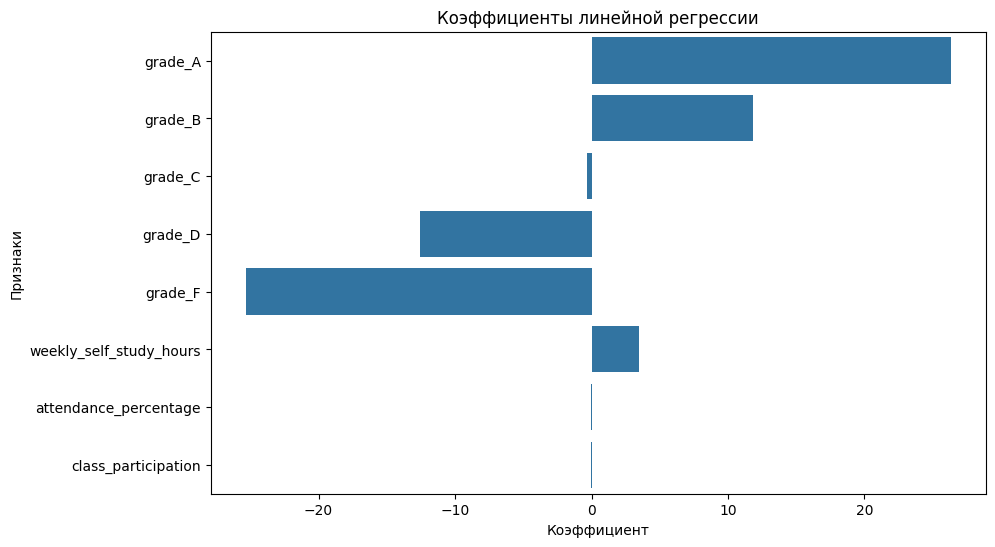

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=model1.coef_, y=X_all.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()


*grade_A:* Самый сильный фактор, повышающий итоговый балл.

*grade_B:* Также повышает предсказанный балл, но со значительно меньшей силой, чем A.

*grade_C:* Практически не влияет на итоговый балл.

*grade_D:* Понижает итоговый балл. Её негативное влияние примерно равно по силе позитивному влиянию оценки B.

*grade_F:* Самый сильный фактор, понижающий итоговый балл.

*weekly_self_study_hours:* Увеличение часов самостоятельной учёбы положительно влияет на итоговый балл.

*attendance_percentage:* Посещаемость не оказывает никакого влияния на предсказание.

*class_participation:* Активность на занятиях также не влияет на итоговый балл.

# **Модель 2**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800000, 200000, 800000, 200000)

In [ ]:
model2 = LinearRegression()

In [ ]:
model2.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

In [ ]:
def calculate_metrics(y_true, y_pred):

  MAE = mean_absolute_error(y_true, y_pred)
  print('MAE %.3f' % MAE)

  MAPE = mean_absolute_percentage_error(y_true, y_pred)
  print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

  R2 = r2_score(y_true, y_pred)
  print('R2=%.3f' % R2)

  MSE = mean_squared_error(y_true, y_pred)
  print('MSE=%.3f' % MSE)

  RMSE = root_mean_squared_error(y_true, y_pred)
  print('RMSE=%.3f' % RMSE)

In [ ]:
print('Метрики для выборки на которых обучалась модель')
calculate_metrics(y_train, y_train_pred)

Метрики для выборки на которых обучалась модель
MAE 3.337
MAPE=0.042, MAPE_as_percent=4.185%
R2=0.932
MSE=16.230
RMSE=4.029


In [ ]:
print('Метрики для выборки на которых модель никогда не обучалась')
calculate_metrics(y_test, y_test_pred)

Метрики для выборки на которых модель никогда не обучалась
MAE 3.339
MAPE=0.042, MAPE_as_percent=4.186%
R2=0.932
MSE=16.230
RMSE=4.029


Метрики качества на обучающей (train) и тестовой (test) выборках практически идентичны. Модель одинаково хорошо работает на данных, которые она никогда не видела, что делает ее очень надежной.

In [ ]:
model2.coef_

array([ 2.62852029e+01,  1.18390032e+01, -3.27838747e-01, -1.25391822e+01,
       -2.52571851e+01,  3.46454348e+00,  1.39274323e-03, -1.66494311e-03])

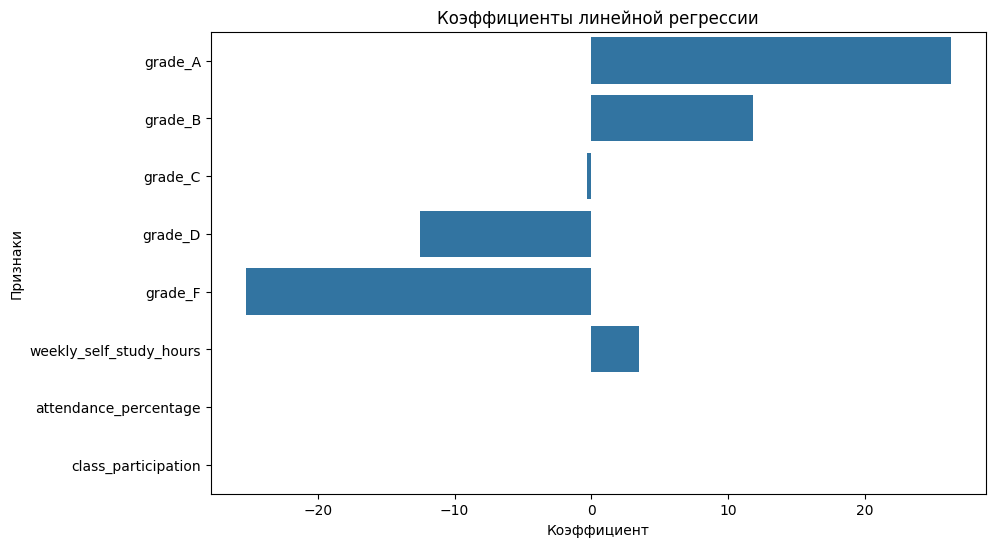

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=model2.coef_, y=X_all.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

*grade_A:* Сильно повышает итоговый балл.

*grade_B:* Также повышает итоговый балл, его влияние заметно, но меньше, чем у A.

*grade_C:* Коэффициент практически равен нулю. Признак нейтрален.

*grade_D:* Понижает итоговый балл.

*grade_F:* Сильно понижает итоговый балл.

*weekly_self_study_hours:* Увеличение часов самостоятельной учёбы положительно влияет на балл.

*attendance_percentage:* Коэффициент равен нулю. Признак полностью исключен моделью.

*class_participation:* Коэффициент также равен нулю. Признак полностью исключен.


Модель 2 полностью обнулила бесполезные признаки (attendance_percentage и class_participation), тогда как Модель 1 лишь присвоила им очень малый вес.

# **Модель 3**

In [ ]:
model3 = LinearRegression()

In [ ]:
model3.fit(X_best, y)

LinearRegression()

In [ ]:
y_pred3 = model3.predict(X_best)
y_pred3

array([95.60319134, 78.89165303, 96.10469298, ..., 93.44673427,
       99.01340251, 95.50289101])

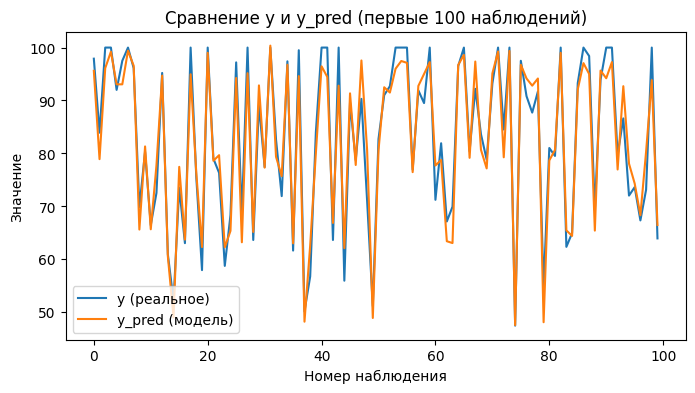

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

n = 100
y_small = y[:n]
y_pred_small = y_pred3[:n]

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(y_small)), y=y_small, label="y (реальное)")
sns.lineplot(x=range(len(y_pred_small)), y=y_pred_small, label="y_pred (модель)")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title(f"Сравнение y и y_pred (первые {n} наблюдений)")
plt.legend()
plt.show()


Модель, обученная только на лучших отобранных признаках (без учета посещаемости и активности), осталась исключительно точной.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

MAE = mean_absolute_error(y, y_pred3)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y, y_pred3)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

R2 = r2_score(y, y_pred3)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y, y_pred3)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y, y_pred3)
print('RMSE=%.3f' % RMSE)


MAE 3.337
MAPE=0.042, MAPE_as_percent=4.186%
R2=0.932
MSE=16.230
RMSE=4.029


Ккачество модели не ухудшилось после удаления бесполезных признаков, все показатели остались на исключительно высоком уровне.

In [94]:
model3.coef_

array([ 26.3042945 ,  11.84951359,  -0.31372265, -12.52849447,
       -25.31159097,   3.46007427])

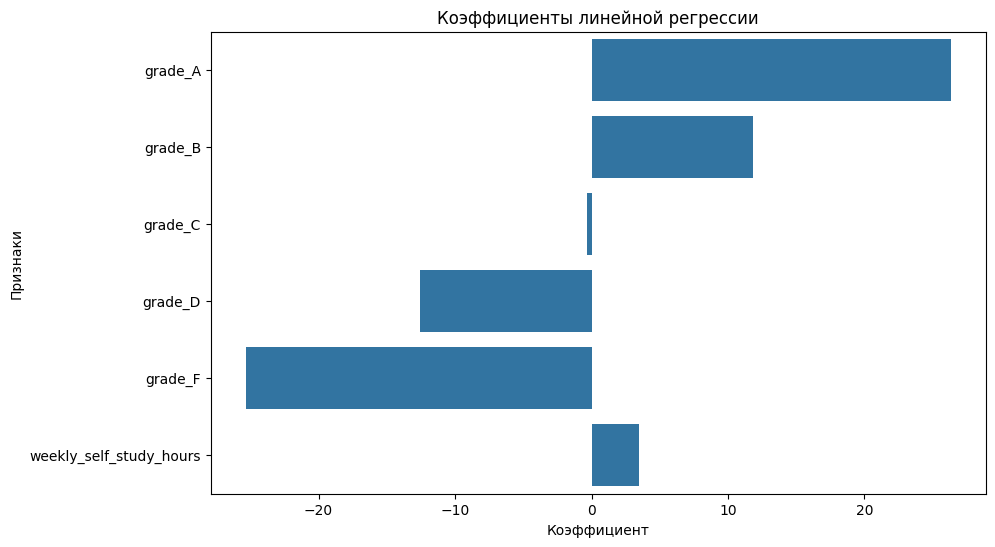

In [95]:
plt.figure(figsize=(10,6))
sns.barplot(x=model3.coef_, y=X_best.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

Удаление признаков (посещаемости и активности) никак не изменило логику модели, но сделало её проще и эффективнее.

# **Модель 4**

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800000, 200000, 800000, 200000)

In [97]:
model4 = LinearRegression()

In [98]:
model4.fit(X_train, y_train)

LinearRegression()

In [99]:
y_train_pred = model4.predict(X_train)
y_test_pred = model4.predict(X_test)

In [100]:
print('Метрики для выборки на которых обучалась модель')
calculate_metrics(y_train, y_train_pred)

Метрики для выборки на которых обучалась модель
MAE 3.337
MAPE=0.042, MAPE_as_percent=4.185%
R2=0.932
MSE=16.230
RMSE=4.029


In [101]:
print('Метрики для выборки на которых модель никогда не обучалась')
calculate_metrics(y_test, y_test_pred)

Метрики для выборки на которых модель никогда не обучалась
MAE 3.339
MAPE=0.042, MAPE_as_percent=4.186%
R2=0.932
MSE=16.230
RMSE=4.029


Метрики на обучающей (train) и тестовой (test) выборках практически идентичны.

In [102]:
model4.coef_

array([ 26.28520258,  11.83899183,  -0.32784273, -12.53919277,
       -25.25715891,   3.46453689])

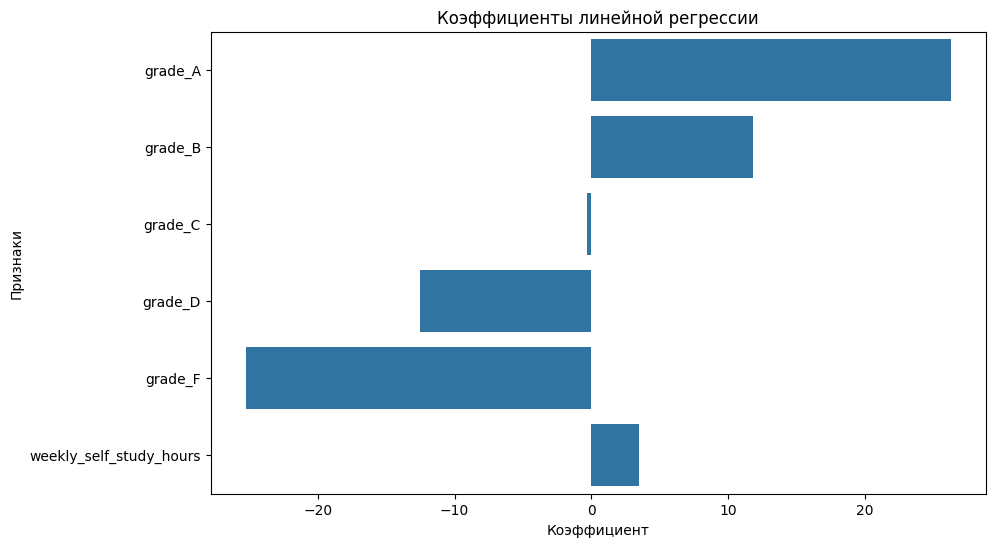

In [103]:
plt.figure(figsize=(10,6))
sns.barplot(x=model4.coef_, y=X_best.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

Все четыре модели, несмотря на разные условия построения, сошлись на идентичных показателях точности и важности признаков. Модель доказала свою надежность, а ее результатам можно полностью доверять.